# 임베딩 방법 비교



## Data

자료는 한국전통지식포털에 실려 있는 전통의학처방 19171 건을 사용하였다. 

In [1]:
from collections import Counter
import numpy as np
import pandas as pd

In [2]:
corpus_path = "../data/formulas.txt"
corpus_ = open( corpus_path, 'r', encoding='utf-8' ).read()
header, corpus_raw = corpus_.split("***")
corpus_raw = corpus_raw.strip()
corpus = [ line.strip() for line in corpus_raw.split("\n") ]
corpus_tokenized = [ line.split() for line in corpus ]

print( "# Corpus Description" )
print( header.strip() )
print()
print( "# Corpus Size: ", len(corpus) )


# Corpus Description
- 출처 : 한국전통지식포탈(www.koreantk.com) > 전통의료 > 처방
- 특징 : 본초 구성만 추출한 데이터
- 데이터 생성일 : 2016.01.16

# Corpus Size:  19162


## Data Overview

In [3]:
size_per_doc = [ len( doc ) for doc in corpus_tokenized ]
all_tokens = sum( corpus_tokenized, [] )
type_with_count_ = Counter( all_tokens )
type_with_count = type_with_count_.items()
count_per_type = list( type_with_count_.values() )

In [4]:
n_of_token = len( all_tokens )
n_of_type = len( type_with_count )
type_freq1 = [ t_ for t_, f_ in type_with_count if f_ == 1 ]
hapax = len( type_freq1 )

In [5]:
print( "# Report for Corpus")
print() 
print( "## Doc Size")
print( "* Max of Doc Size:", max( size_per_doc ) )
print( "* Min of Doc Size:", min( size_per_doc ) )
print( "* Mean of Doc Size: {:.3f}".format( np.mean( size_per_doc ) ) )
print( "* Median of Doc Size: {:.3f}".format( np.median( size_per_doc ) ) )
print() 
print( "## Token and Type")
print( "* N of Token:", n_of_token )
print( "* N of Type:", n_of_type )
print( "* Token/Type: {:.3f}".format( n_of_token /  n_of_type ) )
print( "* hapax: {} ( {:.3f}% )".format( hapax, hapax / n_of_token * 100 ) )
print( "  ----------------------" )
print( "* Max of Type Frequency:", max( count_per_type ) )
print( "* Min of Type Frequency:", min( count_per_type ) )
print( "* Mean of Type Frequency: {:.3f}".format( np.mean( count_per_type ) ) )
print( "* Median of Type Frequency: {:.3f}".format( np.median( count_per_type ) ) )

# Report for Corpus

## Doc Size
* Max of Doc Size: 59
* Min of Doc Size: 1
* Mean of Doc Size: 7.316
* Median of Doc Size: 6.000

## Token and Type
* N of Token: 140198
* N of Type: 1842
* Token/Type: 76.112
* hapax: 388 ( 0.277% )
  ----------------------
* Max of Type Frequency: 7372
* Min of Type Frequency: 1
* Mean of Type Frequency: 76.112
* Median of Type Frequency: 6.000


In [6]:
topn = 20
most_freq_top = type_with_count_.most_common( topn )
type_, freq_ = zip( *most_freq_top )
print( "# Most Frequency Tokens ( TOP {} )".format(topn) )
pd.DataFrame( {"1.Token": type_, "2.Frequency": freq_ } )

# Most Frequency Tokens ( TOP 20 )


,1.Token,2.Frequency
0,감초,7372
1,당귀,3834
2,인삼,3810
3,백출,3137
4,진피,2989
5,천궁,2701
6,반하,2340
7,황금,2052
8,백복령,1990
9,방풍,1943


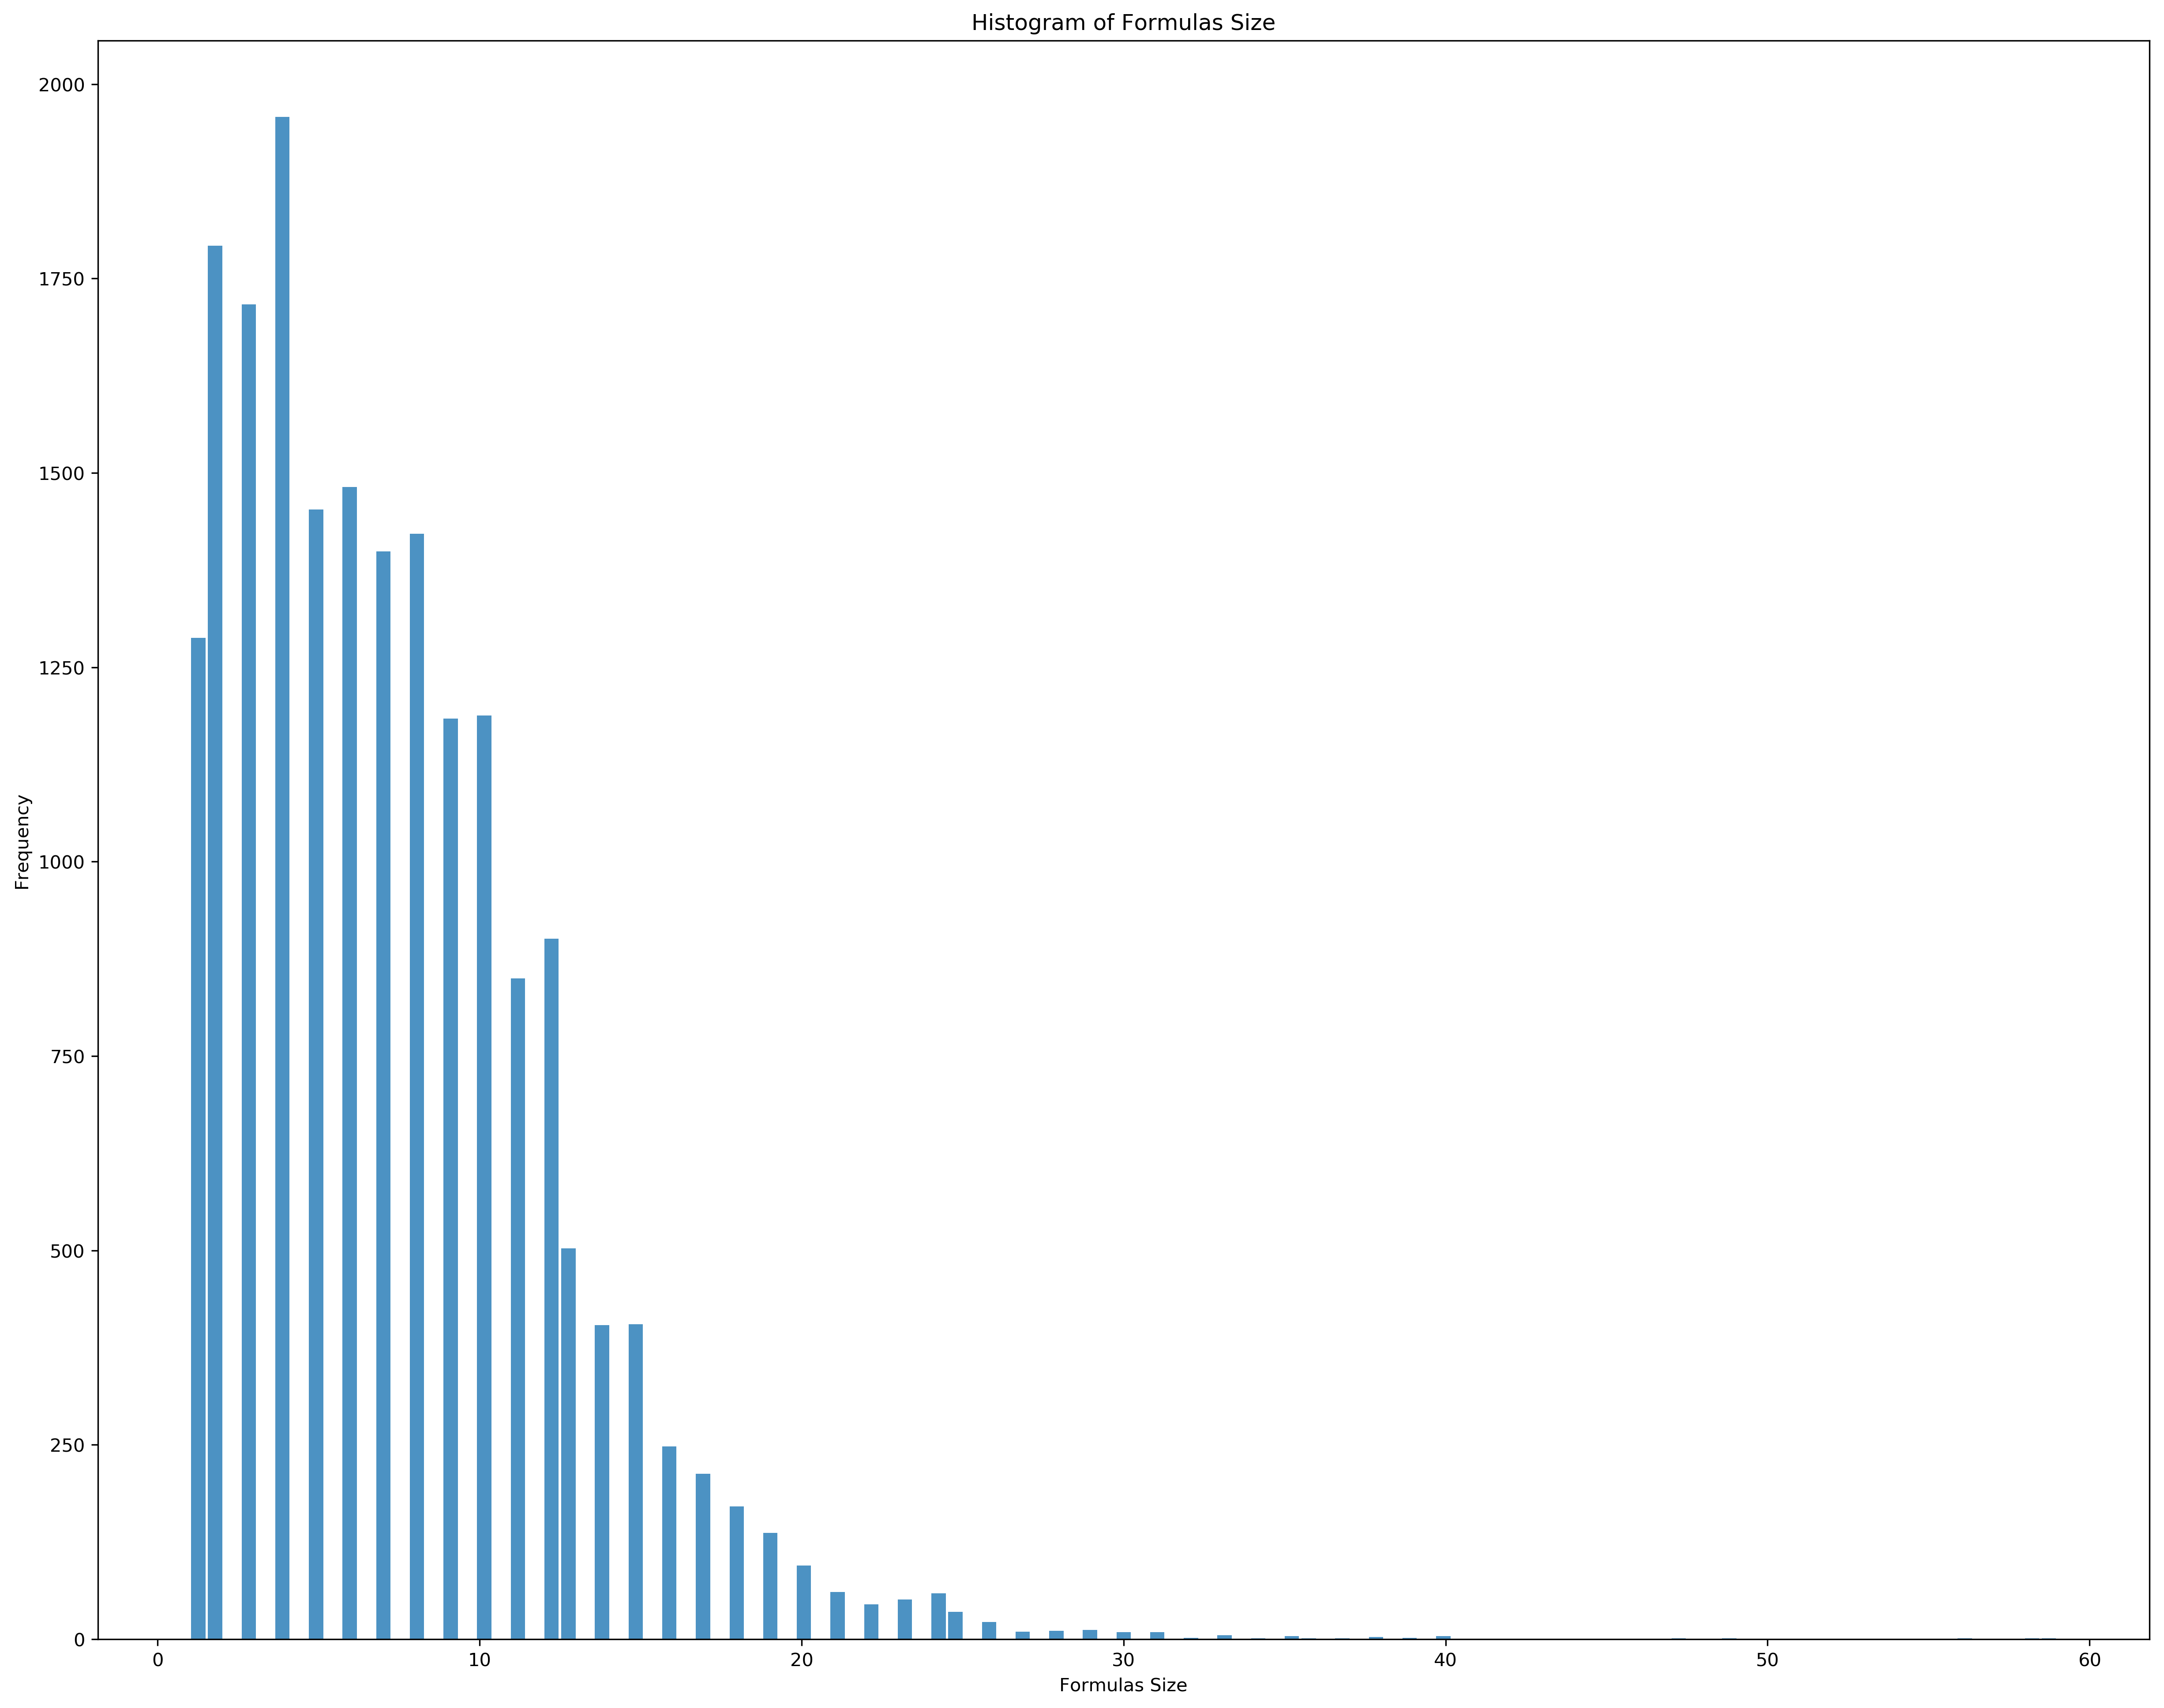

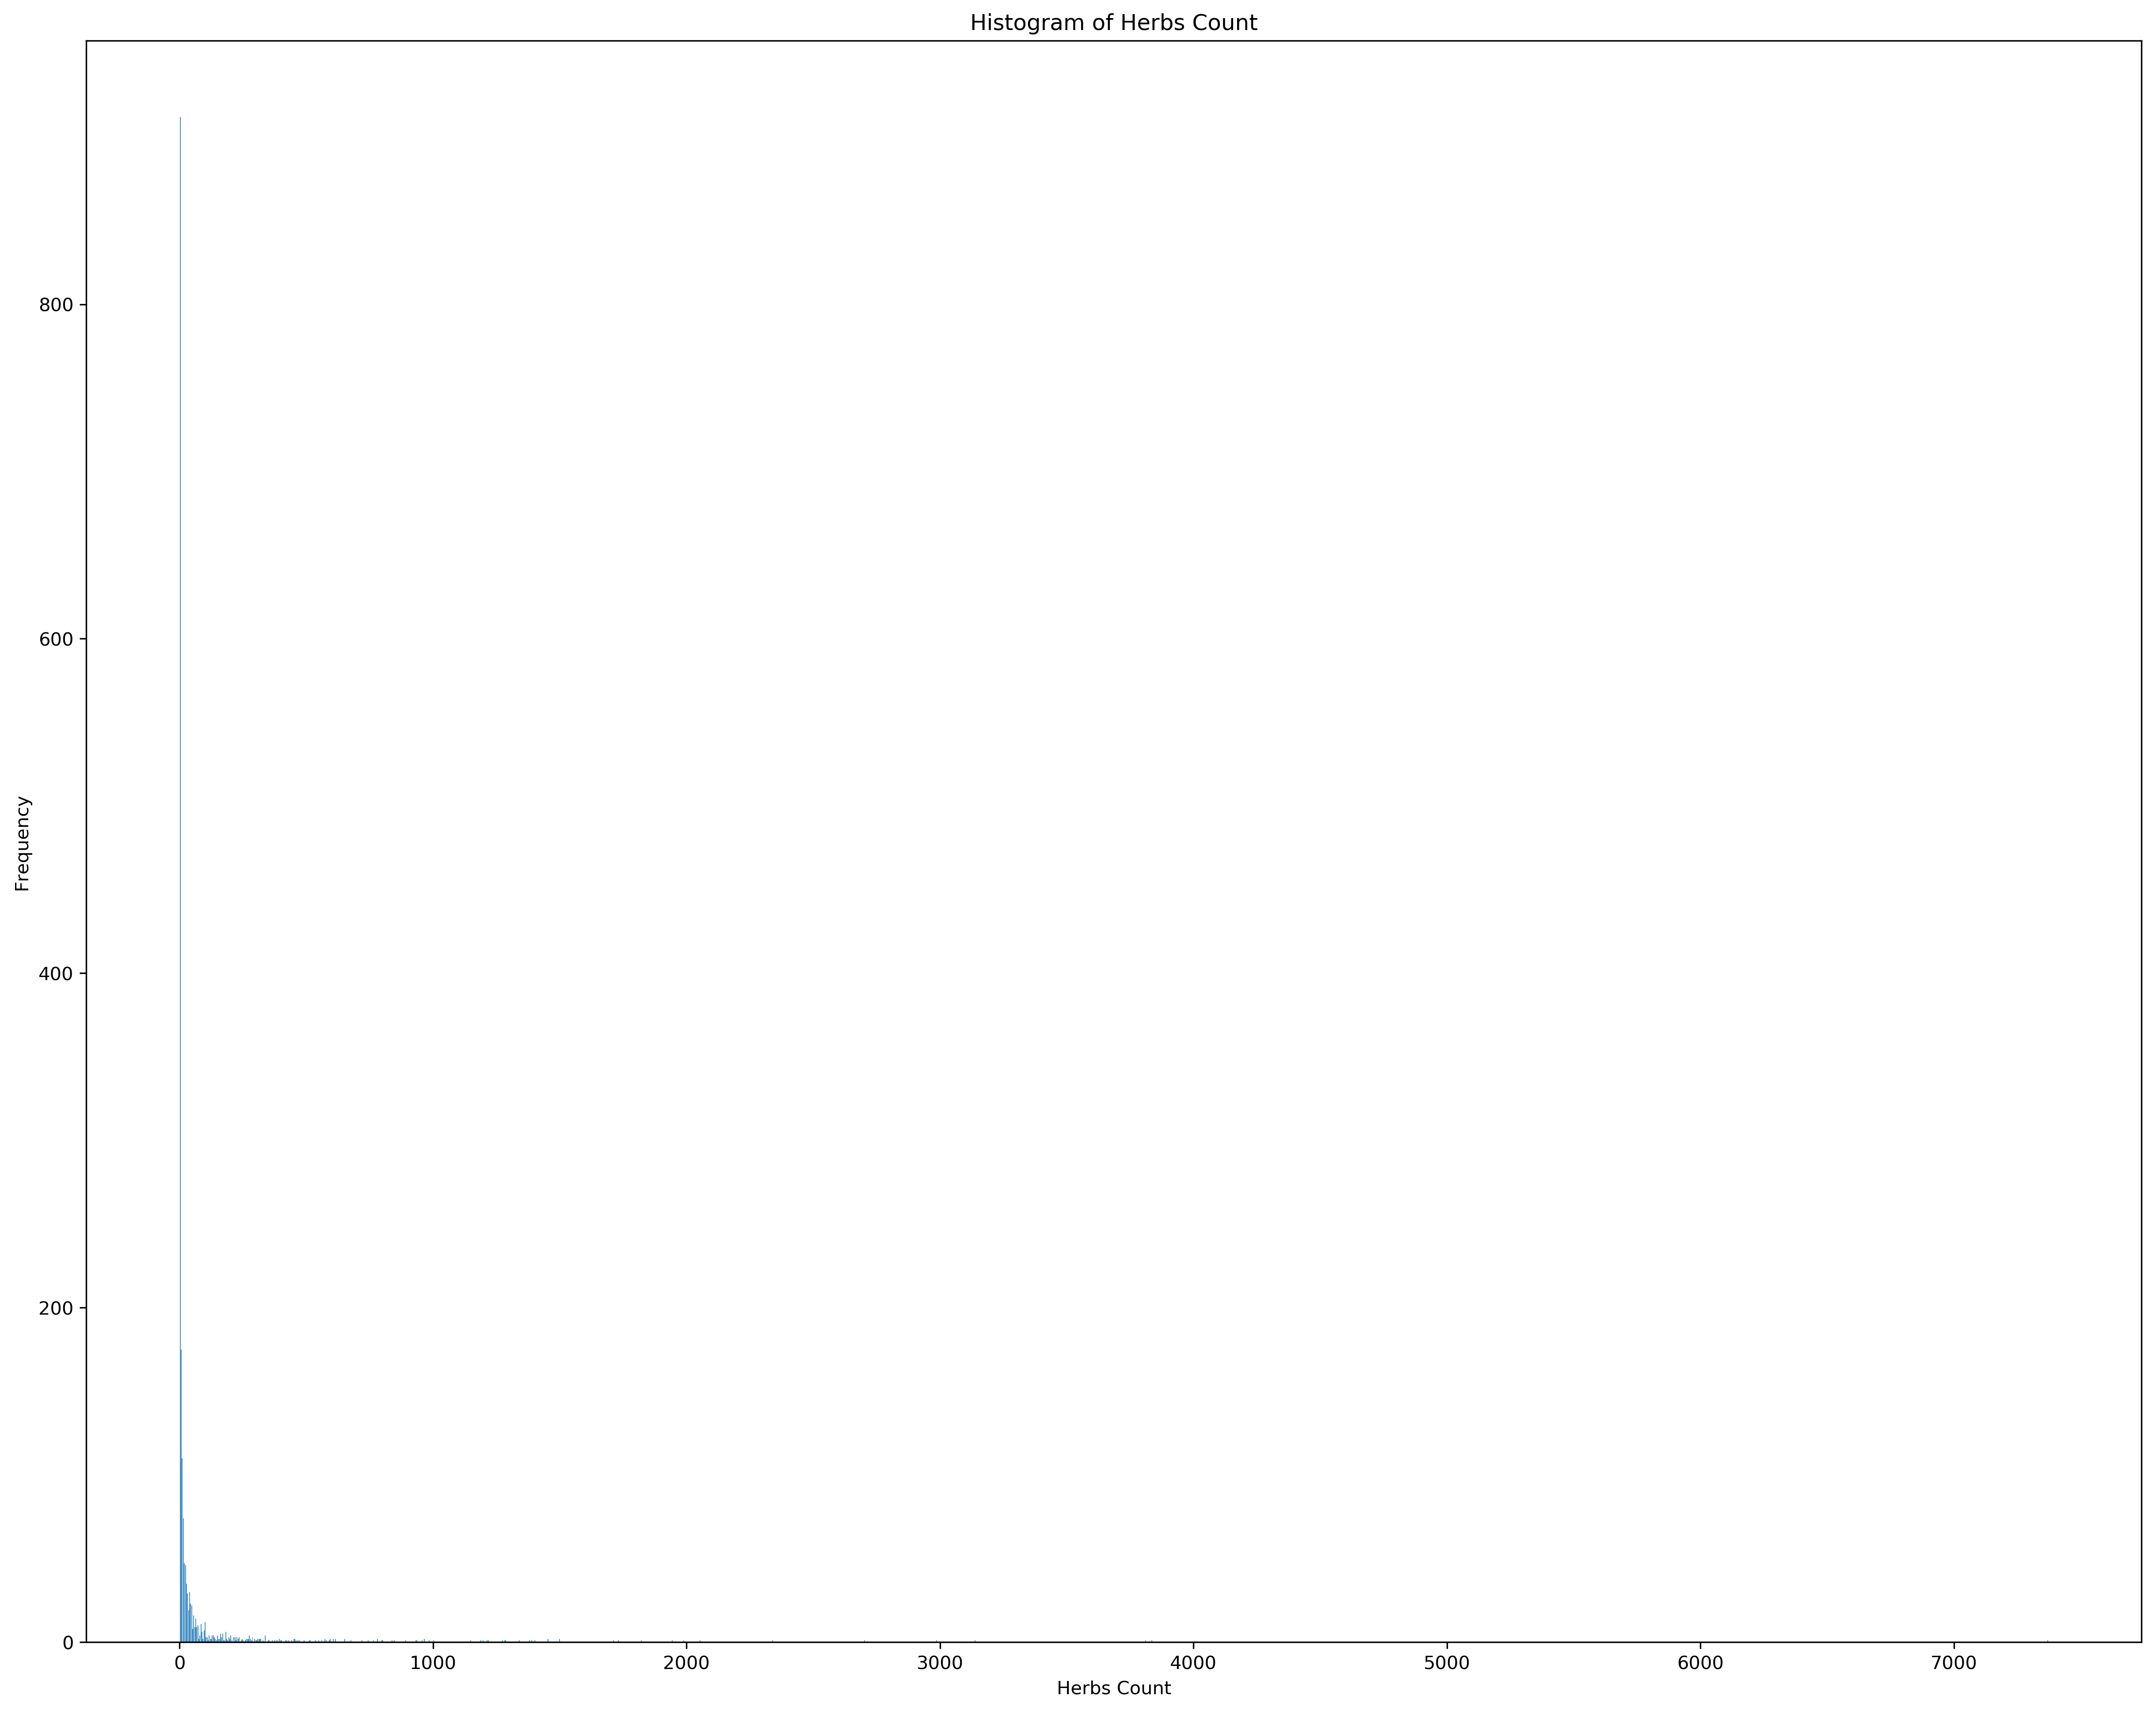

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline  

figure(num=None, figsize=(20, 16), dpi=300, facecolor='w', edgecolor='k')
freq_, bins_, _ = plt.hist( size_per_doc, bins='auto', alpha=0.8, rwidth=0.85 )  # arguments are passed to np.histogram
plt.title("Histogram of Formulas Size")
plt.xlabel('Formulas Size')
plt.ylabel('Frequency')
plt.show()

figure(num=None, figsize=(20, 16), dpi=300, facecolor='w', edgecolor='k')
freq_, bins_, _ = plt.hist( count_per_type, bins='auto', alpha=0.8, rwidth=0.85 )  # arguments are passed to np.histogram
plt.title("Histogram of Herbs Count")
plt.xlabel('Herbs Count')
plt.ylabel('Frequency')
plt.show()